# Ultralytics 简介

[Ultralytics](https://www.ultralytics.com/) [YOLO11](https://github.com/ultralytics/ultralytics) 提供 YOLO 系列的模型，并引入了新功能和改进以进一步提升性能和灵活性。YOLO11 被设计得快速、准确且易于使用，是进行广泛对象检测和跟踪、实例分割、图像分类和姿态估计任务的理想选择。

安装：

```bash
pip install ultralytics
```

或者

```bash
conda install -c conda-forge ultralytics
```

亦或者克隆源码：

```bash
git clone git@github.com:xinetzone/ultralytics.git
```

添加 Python 环境：

In [1]:
import sys
_path = "/media/pc/data/lxw/ai/ultralytics" # ultralytics api 所在目录
sys.path.append(_path)

from ultralytics import YOLO

## YOLO CLI

YOLO 可以直接在命令行接口（CLI）中使用 `yolo` 命令：

```bash
yolo predict model=yolo11n.pt source='https://ultralytics.com/images/bus.jpg'
```

`yolo` 可以用于各种任务和模式，并接受额外参数，例如 `imgsz=640`。请参阅 YOLO [CLI 文档](https://docs.ultralytics.com/usage/cli/) 以获取示例。

## Python API

YOLO 也可以直接在 Python 环境中使用，并接受与上述 CLI 示例中相同的[参数](https://docs.ultralytics.com/usage/cfg/)：

In [2]:
from ultralytics import YOLO

# 加载模型
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:02<00:00, 2.11MB/s]


训练模式用于在自定义数据集上训练 YOLOv11 模型。在此模式下，模型使用指定的数据集和超参数进行训练。训练过程涉及优化模型的参数，以便它能准确预测图像中对象的类别和位置。

```python
# model = YOLO("yolo11n.pt")
# results = model.train(epochs=5)
train_results = model.train(
    data="coco8.yaml",  # 数据集 YAML 路径
    epochs=100,  # 训练轮次
    imgsz=640,  # 训练图像尺寸
    device="cpu",  # 运行设备，例如 device=0 或 device=0,1,2,3 或 device=cpu
)
```

Val 模式用于在训练完成后验证 YOLOv11 模型。在此模式下，模型会在验证集上进行评估，以衡量其[准确性](https://www.ultralytics.com/glossary/accuracy)和泛化性能。此模式可以用于调整模型的超参数，以提高其性能。

```python
metrics = model.val()
```

预测模式用于使用经过训练的 YOLO 模型对新的图像或视频进行预测。在此模式下，模型从检查点文件加载，用户可提供图像或视频以进行推断。模型将预测输入图像或视频中物体的类别和位置。

```python
import cv2
from PIL import Image

from ultralytics import YOLO

model = YOLO("model.pt")
# accepts all formats - image/dir/Path/URL/video/PIL/ndarray. 0 for webcam
results = model.predict(source="0")
results = model.predict(source="folder", show=True)  # Display preds. Accepts all YOLO predict arguments

# from PIL
im1 = Image.open("bus.jpg")
results = model.predict(source=im1, save=True)  # save plotted images

# from ndarray
im2 = cv2.imread("bus.jpg")
results = model.predict(source=im2, save=True, save_txt=True)  # save predictions as labels

# from list of PIL/ndarray
results = model.predict(source=[im1, im2])
```


image 1/1 /media/pc/data/lxw/ai/torch-book/doc/ultralytics/images/bus.jpg: 640x480 4 persons, 1 bus, 135.6ms
Speed: 59.5ms preprocess, 135.6ms inference, 1727.9ms postprocess per image at shape (1, 3, 640, 480)


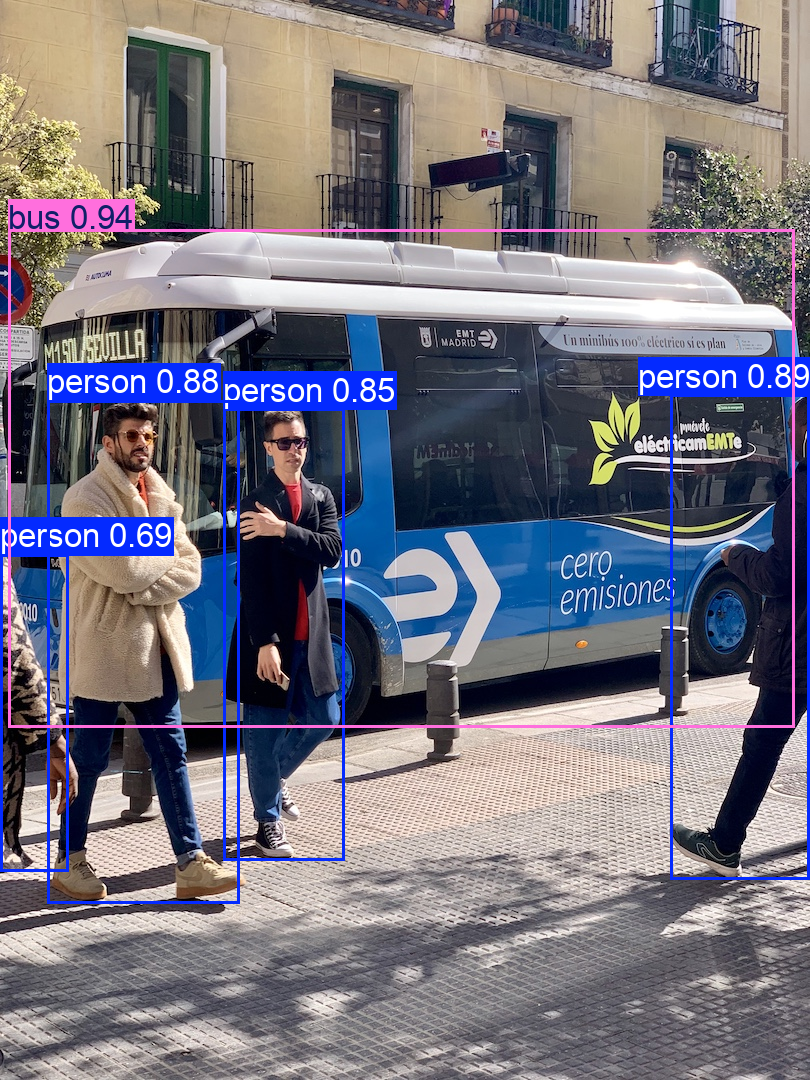

In [4]:
from PIL import Image
# "https://ultralytics.com/images/bus.jpg"
results = model("images/bus.jpg")
# results[0].show()
res_plotted = results[0].plot(pil=True)
Image.fromarray(res_plotted[:, :, ::-1])

将模型导出为 ONNX 格式：

In [5]:
path = model.export(format="onnx")  # 返回导出模型的路径

Ultralytics 8.3.28 🚀 Python-3.12.2 torch-2.5.0 CPU (Intel Xeon E5-2678 v3 2.50GHz)

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

ONNX: starting export with onnx 1.16.2 opset 19...
ONNX: slimming with onnxslim 0.1.34...
ONNX: export success ✅ 4.5s, saved as 'yolo11n.onnx' (10.2 MB)

Export complete (5.0s)
Results saved to /media/pc/data/lxw/ai/torch-book/doc/ultralytics
Predict:         yolo predict task=detect model=yolo11n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolo11n.onnx imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app


追踪模式利用 YOLO 模型实时跟踪目标。在此模式下，模型会从检查点文件中载入，用户可以提供实时视频流以执行实时对象追踪。该模式对于监控系统或自动驾驶汽车等应用非常有用。


```python
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # load an official detection model
model = YOLO("yolo11n-seg.pt")  # load an official segmentation model
model = YOLO("path/to/best.pt")  # load a custom model

# Track with the model
results = model.track(source="https://youtu.be/LNwODJXcvt4", show=True)
results = model.track(source="https://youtu.be/LNwODJXcvt4", show=True, tracker="bytetrack.yaml")
```

基准模式用于评估 YOLOv不同导出格式的速度和准确性。这些基准提供了有关导出格式大小、其 mAP50-95指标（针对目标检测和分割）或top5准确率指标（针对分类），以及各种导出格式（如ONNX、OpenVINO、TensorRT等）的每张图像推理时间（毫秒）。这些信息可以帮助用户根据他们对速度和准确性的需求，为其特定用例选择最佳的导出格式。

```python
from ultralytics.utils.benchmarks import benchmark

# Benchmark
benchmark(model="yolo11n.pt", data="coco8.yaml", imgsz=640, half=False, device=0)
```

{class}`ultralytics.YOLO` 模型类是在 `Trainer` 类上的高级封装。每个 YOLO 任务都有自己独特的训练器，这些训练器继承自  {class}`ultralytics.engine.predictor.BaseTrainer` 类。

```python
from ultralytics.models.yolo import DetectionPredictor, DetectionTrainer, DetectionValidator

# trainer
trainer = DetectionTrainer(overrides={})
trainer.train()
trained_model = trainer.best

# Validator
val = DetectionValidator(args=...)
val(model=trained_model)

# predictor
pred = DetectionPredictor(overrides={})
pred(source=SOURCE, model=trained_model)

# resume from last weight
overrides["resume"] = trainer.last
trainer = detect.DetectionTrainer(overrides=overrides)
```

您可以轻松定制训练器以支持自定义任务或探索研发想法。

请参阅 YOLO [Python 文档](https://docs.ultralytics.com/usage/python/) 以获取更多示例。

## Ultralytics 设置

Ultralytics 库提供了功能强大的设置管理系统，允许用户对实验进行精细控制。通过使用 {mod}`ultralytics.utils` 模块中的 {class}`~ultralytics.utils.SettingsManager`，用户可以方便地访问和修改他们的设置。这些设置被保存在环境用户配置目录中的 JSON 文件中，可以在 Python 环境中直接查看或修改，也可以通过命令行界面（CLI）进行操作。

可以使用 Python 查看您的设置：

In [ ]:
from ultralytics import settings

# View all settings
print(settings)

# 返回指定的设置
value = settings["runs_dir"]

调用 {func}`~ultralytics.settings.update` 来更改设置：

```python
from ultralytics import settings

# 修改单个设置
settings.update({"runs_dir": "/path/to/runs"})

# 修改多个设置
settings.update({"runs_dir": "/path/to/runs", "tensorboard": False})

# 恢复默认设置
settings.reset()
```

下表概述了 Ultralytics 中可供调整的设置。每项设置都附有示例值、数据类型和简要说明。

	示例值	数据类型	说明

| 名称              | 示例值         | 数据类型 | 说明                                                                                                       |
| ------------------ | --------------------- | --------- | ----------------------------------------------------------------------------------------------------------------- |
| `settings_version` | `'0.0.4'`             | `str`     | Ultralytics {mod}`~ultralytics.settings` 版本（与 Ultralytics `pip` 版本不同）                                       |
| `datasets_dir`     | `'/path/to/datasets'` | `str`     | 存储数据集的目录                                                                     |
| `weights_dir`      | `'/path/to/weights'`  | `str`     | 存储权重的目录                                                                  |
| `runs_dir`         | `'/path/to/runs'`     | `str`     | 存储实验运行的目录                                                              |
| `uuid`             | `'a1b2c3d4'`          | `str`     | 当前 {mod}`~ultralytics.settings` 的唯一标识符                                                                   |
| `sync`             | `True`                | `bool`    | 是否将分析和崩溃同步到 HUB                                                                    |
| `api_key`          | `''`                  | `str`     | Ultralytics HUB [API Key](https://hub.ultralytics.com/settings?tab=api+keys)                                                                                      |
| `clearml`          | `True`                | `bool`    | 是否使用 [ClearML](https://docs.ultralytics.com/zh/integrations/clearml/) 日志                                                                                  |
| `comet`            | `True`                | `bool`    | 是否使用 [Comet ML](https://bit.ly/yolov8-readme-comet) 进行实验跟踪和可视化                                               |
| `dvc`              | `True`                | `bool`    | 是否使用 [DVC 进行实验跟踪](https://dvc.org/doc/dvclive/ml-frameworks/yolo) 和版本控制                                                 |
| `hub`              | `True`                | `bool`    | 是否使用 [Ultralytics HUB 集成](https://hub.ultralytics.com/)                                                                    |
| `mlflow`           | `True`                | `bool`    | 是否使用 [MLFlow](https://docs.ultralytics.com/zh/integrations/mlflow/) 进行实验跟踪                                                                  |
| `neptune`          | `True`                | `bool`    | 是否使用 [Neptune](https://neptune.ai/) 进行实验跟踪                                                                  |
| `raytune`          | `True`                | `bool`    | 是否使用 [Ray Tune](https://docs.ultralytics.com/zh/integrations/ray-tune/) 进行 [参数调优](https://www.ultralytics.com/glossary/hyperparameter-tuning) |
| `tensorboard`      | `True`                | `bool`    | 是否使用 [TensorBoard](https://docs.ultralytics.com/zh/integrations/tensorboard/) 可视化                                                                   |
| `wandb`            | `True`                | `bool`    | 是否使用 [Weights & Biases](https://docs.ultralytics.com/zh/integrations/weights-biases/) 记录日志                                                                         |
| `vscode_msg`       | `True`                | `bool`    | 当 VS Code 终端检测到时，会提示下载 [Ultralytics-Snippets](https://docs.ultralytics.com/zh/integrations/vscode/) 扩展                   |